In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from numpy.linalg import inv
import matplotlib.pyplot as plt
import scipy.integrate 
import scipy.special
from sklearn import preprocessing

In [3]:
import numpy as np
import pandas as pd
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [4]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
import seaborn as sns

# Import Data

In [5]:
df = pd.read_csv("Data_Final")

In [6]:
df.to_csv ('Yahoo_Data.csv', index=None)

In [7]:
positive = pd.read_csv('positive-words.txt',header = None)

In [8]:
negative = pd.read_csv('negative-words.txt',header = None)

In [9]:
df = df.iloc[:,1:]

In [10]:
df.head()

,User_id,Bus_id,Star,Useful,Cool,Funny,Review,State,City,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star
0,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0,0,0,"Great burgers,fries and salad! Burgers have a...",CA,Goleta,4.0,922,1687,694,1070,"2015,2016,2017,2018,2019,20,20,2021",51,4.20
1,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5.0,0,0,0,We were a bit weary about trying the Shellfish...,CA,Santa Barbara,4.0,338,800,144,353,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",30,4.12
2,Uk3X2AypU8AqvcYEVf7s6Q,eL4lyE7LNoXEMvpcJ8WNVw,3.0,5,0,0,This was a tough one! On the merits of the w...,CA,Santa Barbara,4.0,431,2126,1245,1476,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",76,4.05
3,LcqNuhqaYt5ekKzaRirmIg,SZU9c8V2GuREDN5KgyHFJw,5.0,2,1,0,"I love trying fresh seafood on piers, wharfs a...",CA,Santa Barbara,4.0,258,452,125,183,"2015,2016,2017",37,3.99
4,gasLVm0KRwrVhPGRcqATjw,CHh0ZFrQcsk4boOItr2Zuw,4.0,1,2,0,I stopped in because I was hungry for some sna...,CA,Carpinteria,3.0,1638,2658,933,2297,"2014,2015,2016,2017,2018,2019,20,20,2021",105,3.79


In [11]:
df['Review']

0        Great burgers,fries and salad!  Burgers have a...
1        We were a bit weary about trying the Shellfish...
2        This was a tough one!   On the merits of the w...
3        I love trying fresh seafood on piers, wharfs a...
4        I stopped in because I was hungry for some sna...
                               ...                        
53840    So let me begin by stating that the owner of N...
53841    We've used Jerry The Plumber for water heater ...
53842    Wow, talk about some of the best deals I've ev...
53843    My Husband and I decided to stop into Hook and...
53844    We have asked Burgundy Blue to capture over 5 ...
Name: Review, Length: 53845, dtype: object

In [12]:
df['Users_Ave_Star']

0        4.20
1        4.12
2        4.05
3        3.99
4        3.79
         ... 
53840    3.41
53841    4.74
53842    4.74
53843    4.36
53844    3.94
Name: Users_Ave_Star, Length: 53845, dtype: float64

## How to deal with imbalanced data
https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

1. change evaluation matrices? Sometimes, for imbalanced dataset, F1 might be a better evaluation
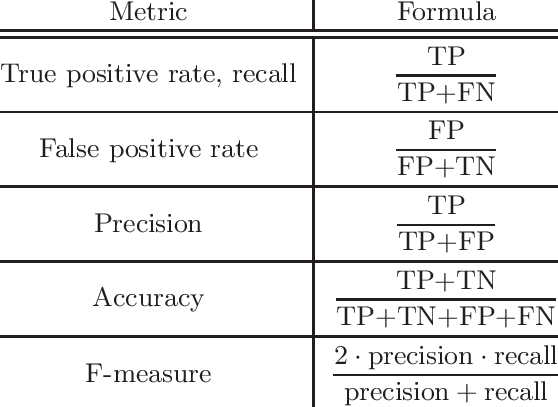
2. Under sampling : since this dataset is large, we can balanced the dataset by giving balanced data for every class
    - Over sampling: SMOTE (using knn to make synthetic data)
3. cross validation can be applied after under sampling but cross validation should be applied before over sampling
4. 有个package叫balancedbagging classifier 和balanced random forest classifier可以比较这两个的结果和
    - The sampling_strategy decides the type of resampling required (e.g. ‘majority’ – resample only the majority class, ‘all’ – resample all classes, etc) and replacement decides whether it is going to be a sample with replacement or not. https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.BalancedBaggingClassifier.html
5. **change the threshold** - For imbalanced class problems, this default threshold may not work properly. We need to change the threshold to the optimum value so that it can efficiently separate two classes. We can use ROC Curves and Precision-Recall Curves to find the optimal threshold for the classifier. We can also use a grid search method or search within a set of values to identify the optimal value. https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/
6. Again, if you are using scikit-learn and logistic regression, there's a parameter called class-weight. Set this to balanced.

In [13]:
print("class rate 1:", sum(df['Star'] == 1)/len(df['Star']))
print("class rate 2:", sum(df['Star'] == 2)/len(df['Star']))
print("class rate 3:", sum(df['Star'] == 3)/len(df['Star']))
print("class rate 4:", sum(df['Star'] == 4)/len(df['Star']))
print("class rate 5:", sum(df['Star'] == 5)/len(df['Star']))

class rate 1: 0.03523075494474882
class rate 2: 0.06425851982542483
class rate 3: 0.15683907512303835
class rate 4: 0.346457424087659
class rate 5: 0.397214226019129


In [14]:
df['Star'].value_counts()

5.0    21388
4.0    18655
3.0     8445
2.0     3460
1.0     1897
Name: Star, dtype: int64

## Assign X and Y

In [15]:
X = df.drop(['Star','Elite','Bus_id','User_id','State','City'],axis = 1)

In [16]:
X.head()

,Useful,Cool,Funny,Review,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,User_Fans,Users_Ave_Star
0,0,0,0,"Great burgers,fries and salad! Burgers have a...",4.0,922,1687,694,1070,51,4.20
1,0,0,0,We were a bit weary about trying the Shellfish...,4.0,338,800,144,353,30,4.12
2,5,0,0,This was a tough one! On the merits of the w...,4.0,431,2126,1245,1476,76,4.05
3,2,1,0,"I love trying fresh seafood on piers, wharfs a...",4.0,258,452,125,183,37,3.99
4,1,2,0,I stopped in because I was hungry for some sna...,3.0,1638,2658,933,2297,105,3.79


In [17]:
Y = df['Star']

In [18]:
Y

0        5.0
1        5.0
2        3.0
3        5.0
4        4.0
        ... 
53840    3.0
53841    5.0
53842    5.0
53843    5.0
53844    5.0
Name: Star, Length: 53845, dtype: float64

## Train Test Split

In [19]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.2)

In [20]:
print("1", sum(Y_train==1)/len(Y_train))
print("2", sum(Y_train==2)/len(Y_train))
print("3", sum(Y_train==3)/len(Y_train))
print("4", sum(Y_train==4)/len(Y_train))
print("5", sum(Y_train==5)/len(Y_train))

1 0.035240040858018386
2 0.06425851982542483
3 0.15683907512303835
4 0.346457424087659
5 0.39720494010585944


## Data Cleaning

### Drop na

In [21]:
X_train = X_train.dropna()

In [22]:
X_test = X_test.dropna()

In [23]:
Y_train = Y_train.dropna()
Y_test = Y_test.dropna()

In [24]:
len(X_train) == len(Y_train),len(X_test) == len(Y_test)

(True, True)

### Finding a list for Sentiment analysis

since the general stop-words = "English", removes meaningful words like "not", removing negative meaning stop-words like "not", "shouldn't", "won't", etc affects the performance greatly. Thus,we need to find a different list of stop words for this project

https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a

We picked nltk stop words between few different libraries as it removes the least amount of words (we try to perserve more information), and modified it a little bit. We removed sentiment words like "not","no“,"cannot" from stop-words list


In [25]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')

In [26]:
remove = ['not','no','nor','most','very',"don't","aren't","couldn","couldn't",'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
for r in remove:
    sw_nltk.remove(r)

In [27]:
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 's', 't', 'can', 'will

### Tokenization

In [28]:
from gensim.utils import simple_preprocess
X_train['Review']=[simple_preprocess(line, deacc=True) for line in X_train['Review']]

In [29]:
X_train['Review'].head()

8508     [the, real, reason, giving, this, place, star,...
21610    [am, glad, to, have, place, in, goleta, where,...
9895     [don, think, we, will, come, back, here, again...
20283    [my, friend, been, to, india, and, she, still,...
936      [love, sun, tues, they, have, amazing, cheap, ...
Name: Review, dtype: object

### Remove stop-words

In [30]:
for i in (X_train['Review'].index.to_list()):
    X_train['Review'][i] = [word for word in X_train['Review'][i] if word.lower() not in sw_nltk]

/var/folders/z0/kv1zx48j29n_7rvhky2s948m0000gn/T/ipykernel_38378/2000847710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Review'][i] = [word for word in X_train['Review'][i] if word.lower() not in sw_nltk]


In [31]:
X_train['Review'].head()

8508     [real, reason, giving, place, star, passion, f...
21610    [glad, place, goleta, grab, quick, good, seafo...
9895     [think, come, back, no, neck, tattoo, policy, ...
20283    [friend, india, still, loves, place, take, goo...
936      [love, sun, tues, amazing, cheap, burger, spec...
Name: Review, dtype: object

### Stemming
Stemming process reduces the words to its’ root word. Unlike Lemmatization which uses grammar rules and dictionary for mapping words to root form, stemming simply removes suffixes/prefixes. Stemming is widely used in the application of SEOs, Web search results, and information retrieval since as long as the root matches in the text somewhere it helps to retrieve all the related documents in the search.

Among different methods for stemming, we pick Porter Stemmer as it is simpler and faster

In [32]:
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()

X_train['Review'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in X_train['Review'] ]
X_train['Review'].head()

8508     [real, reason, give, place, star, passion, fru...
21610    [glad, place, goleta, grab, quick, good, seafo...
9895     [think, come, back, no, neck, tattoo, polici, ...
20283    [friend, india, still, love, place, take, good...
936      [love, sun, tue, amaz, cheap, burger, special,...
Name: Review, dtype: object

### Lemmatization
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word. 

For instance, lemmatization will change "best" to "good"... However, it does loose some information for sentiment analysis. Therefore, in this case, we choose to not use lemmatization but use stemming

### TF-IDF

The whole idea is to weigh down the frequent terms while scaling up the rare ones. (helpful for search engines but maybe not in this case?)

A high weight in tf–idf is reached by a high term frequency (in the given document) and a low document frequency of the term in the whole collection of documents; the weights hence tend to filter out common terms. 
所以我们可以用TF-IDF来filter出一些常见的词汇

TF-IDF gives larger values for less frequent words in the document corpus. TF-IDF value is high when both IDF and TF values are high i.e the word is rare in the whole document but frequent in a document.

TF-IDF also doesn’t take the semantic meaning of the words.

TF = number of times the term appears in the doc/total number of words in the doc

IDF = ln(number of docs/number docs the term appears in)

In [33]:
for i in (X_train['Review'].index.to_list()):
    X_train['Review'][i] = " ".join(X_train['Review'][i])
    
X_train['Review'].head()

/var/folders/z0/kv1zx48j29n_7rvhky2s948m0000gn/T/ipykernel_38378/2330392899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Review'][i] = " ".join(X_train['Review'][i])


8508     real reason give place star passion fruit cock...
21610    glad place goleta grab quick good seafood favo...
9895     think come back no neck tattoo polici bf clean...
20283    friend india still love place take good sign o...
936      love sun tue amaz cheap burger special take ad...
Name: Review, dtype: object

In [34]:
# use tfidf by removing tokens that don't appear in at least 10 reviews
vect = TfidfVectorizer(min_df=10, stop_words=None) #look into TfidfVectorizer

# Fit and transform
X_Review = vect.fit_transform(X_train['Review']) #transforms the document headlines

In [35]:
X_Review_df = pd.DataFrame(X_Review.toarray(), columns = vect.get_feature_names())
X_Review_df

,aaa,aaron,ab,aback,abalon,abandon,abc,abil,abl,aboard,...,zip,zippi,zizzo,zodo,zombi,zone,zoo,zooker,zoom,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


highlight一些 tf_idf表示sentiment的词语，然后sum他们的和，最后选取sum出来 值>150的词语作为bag of words的dictionary

In [36]:
positive = pd.read_csv('positive-words.txt',header = None)
negative = pd.read_csv('negative-words.txt',header = None)
positive.columns = ["positive"]
pos_list = list(positive['positive'])
negative.columns = ["negative"]
neg_list = list(negative['negative'])

In [37]:
sen_dic = []
sen_dic = list((set(neg_list).union(set(pos_list))).intersection(set(vect.get_feature_names())))

In [38]:
X_Review_df[sen_dic] = X_Review_df[sen_dic]*10

In [39]:
sum_val = X_Review_df.apply(sum,axis = 0)

In [43]:
bow_dic = X_Review_df.columns[sum_val >= 200].to_list()

In [44]:
len(bow_dic)

459

### Bag of Words
The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.

The bag-of-words model is commonly used in methods of document classification where the (frequency of) occurrence of each word is used as a feature for training a classifier.

BOW doesn’t work very well when there are small changes in the terminology we are using as here we have sentences with similar meaning but with just different words. -- thus inroduce lemmatization

Sparse vectors require more memory and computational resources when modeling and the vast number of positions or dimensions can make the modeling process very challenging for traditional algorithms.As such, there is pressure to decrease the size of the vocabulary when using a bag-of-words model. -- Thus introduce NMF to do dimensionality reduction and NMF >PCA and SVM because **the non-negativity constraint extract the useful information from the result and better for interpretation**

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
CountVec = CountVectorizer(ngram_range=(1,1), max_df = 21538, min_df = 10)# to use bigrams ngram_range=(2,2) # max_feature can only control the most common top words

In [46]:
count_matrix = CountVec.fit_transform(X_train['Review'])
count_array = count_matrix.toarray()
BOW_df = pd.DataFrame(data=count_array,columns = CountVec.get_feature_names())

In [47]:
BOW_df.head()

,aaa,aaron,ab,aback,abalon,abandon,abc,abil,abl,aboard,...,zip,zippi,zizzo,zodo,zombi,zone,zoo,zooker,zoom,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
bow_dic = list(set(bow_dic).intersection(set(BOW_df.columns)))
BOW_df = BOW_df[bow_dic]
BOW_df.index = X_train.index
BOW_df.head()

,open,sinc,bore,safe,egg,portion,burn,crack,realli,overal,...,seat,regret,nice,great,must,definit,mexican,stop,drag,appeal
8508,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
21610,0,0,0,0,0,0,0,0,2,0,...,0,0,1,0,0,0,0,0,0,0
9895,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
20283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
X_train_clean = pd.concat([X_train, BOW_df], axis=1)

In [57]:
X_train_clean = X_train_clean.drop('Review',axis = 1)

In [58]:
X_train_clean.head()

,Useful,Cool,Funny,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,User_Fans,Users_Ave_Star,...,seat,regret,nice,great,must,definit,mexican,stop,drag,appeal
8508,5,2,1,4.0,2100,5196,1852,3079,200,4.08,...,0,0,0,0,1,0,0,0,0,0
21610,0,0,0,4.0,195,208,50,70,7,4.05,...,0,0,1,0,0,0,0,0,0,0
9895,2,0,0,3.5,293,556,134,277,29,4.32,...,0,0,1,0,0,0,0,1,0,0
20283,0,1,0,4.5,1036,2667,1609,2075,105,4.01,...,0,0,0,0,0,0,0,0,0,0
936,1,1,2,4.0,217,665,353,352,56,3.71,...,0,0,0,0,0,0,0,0,0,0


In [61]:
Y_train.head()

8508     2.0
21610    4.0
9895     1.0
20283    4.0
936      5.0
Name: Star, dtype: float64

### change thredshold? How to do train test in NMF?

# Feature Extraction

### LASSO
https://medium.com/@sabarirajan.kumarappan/feature-selection-by-lasso-and-ridge-regression-python-code-examples-1e8ab451b94b

In [62]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(X_train_clean, np.ravel(Y_train,order='C'))
X_train_LSimportant = pd.DataFrame(X_train_clean)

In [63]:
X_train_LSimportant

,Useful,Cool,Funny,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,User_Fans,Users_Ave_Star,...,seat,regret,nice,great,must,definit,mexican,stop,drag,appeal
8508,5,2,1,4.0,2100,5196,1852,3079,200,4.08,...,0,0,0,0,1,0,0,0,0,0
21610,0,0,0,4.0,195,208,50,70,7,4.05,...,0,0,1,0,0,0,0,0,0,0
9895,2,0,0,3.5,293,556,134,277,29,4.32,...,0,0,1,0,0,0,0,1,0,0
20283,0,1,0,4.5,1036,2667,1609,2075,105,4.01,...,0,0,0,0,0,0,0,0,0,0
936,1,1,2,4.0,217,665,353,352,56,3.71,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8887,0,0,0,3.5,231,169,34,22,1,3.47,...,0,0,0,0,0,0,0,0,0,0
18716,0,0,0,4.0,443,492,281,225,27,3.81,...,1,0,0,0,0,0,0,0,0,0
28554,0,0,0,4.0,1535,1889,824,1912,23,3.85,...,0,0,0,0,0,0,0,0,0,0
18007,0,0,0,4.0,404,430,99,193,23,3.80,...,0,0,0,1,0,1,0,0,0,0


In [64]:
selected_feat = X_train_clean.columns[(sel_.get_support())]
selected_feat

Index(['Useful', 'Cool', 'Funny', 'Bus_Ave_Star', 'User_Review_count',
       'User_Useful_count', 'User_Funny_count', 'User_Cool_count', 'User_Fans',
       'Users_Ave_Star',
       ...
       'seat', 'regret', 'nice', 'great', 'must', 'definit', 'mexican', 'stop',
       'drag', 'appeal'],
      dtype='object', length=469)

In [65]:
print('total features: {}'.format((X_train_clean.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
np.sum(sel_.estimator_.coef_ == 0)))

total features: 469
selected features: 469
features with coefficients shrank to zero: 135


In [68]:
sel_.estimator_.coef_

(5, 469)

In [78]:
sel_.estimator_.coef_

array([[ 0.15081932, -0.42096425,  0.25887656, ...,  0.02877641,
         0.29895573,  0.        ],
       [ 0.06097415, -0.20987084,  0.13036157, ..., -0.17242763,
         0.        ,  0.        ],
       [-0.00253121, -0.06038897,  0.06708031, ..., -0.01995372,
         0.        ,  0.03173867],
       [-0.10940837,  0.10969511,  0.00895483, ..., -0.01280754,
         0.06475195, -0.01206696],
       [ 0.00140969,  0.06637186, -0.09748529, ...,  0.03981104,
         0.07200222, -0.0545027 ]])

In [79]:
ave_estimators = (sel_.estimator_.coef_[0] + sel_.estimator_.coef_[1] + sel_.estimator_.coef_[2] +sel_.estimator_.coef_[3]+sel_.estimator_.coef_[4])/5 

In [80]:
ave_estimators

array([ 2.02527170e-02, -1.03031420e-01,  7.35575966e-02, -1.97486844e-01,
       -1.97348523e-04,  4.93914631e-05, -4.12329762e-05, -1.75647704e-05,
       -2.98869097e-05, -2.76724692e-01,  3.62722003e-02,  4.02312784e-02,
        6.40045090e-02, -4.71930694e-02,  7.86360406e-03, -3.75885717e-02,
        1.32863251e-01,  9.65006607e-02, -2.32680392e-02, -1.24160875e-01,
       -1.49856701e-02, -6.96047672e-02, -3.39741231e-01,  1.96098713e-02,
       -1.42727677e-01, -3.94029559e-02, -9.30384354e-03, -2.26282985e-02,
       -3.54304716e-03, -1.00730752e-01, -1.39193423e-01,  3.57783119e-02,
       -5.30166876e-02, -2.69235383e-01,  1.96859162e-02, -4.04330481e-01,
        6.05633416e-02, -1.52403110e-01, -2.07842015e-02,  2.55860012e-03,
        3.09904973e-02, -1.10441804e-01,  8.99678138e-03, -1.92165076e-02,
       -2.03511839e-02, -1.06620978e-02,  2.44517090e-03, -5.36600061e-02,
       -2.03833948e-02,  1.10876081e-01, -9.75750934e-02,  2.11886939e-02,
       -5.90634774e-02,  

In [81]:
LS_importance = pd.DataFrame(ave_estimators)
LS_importance.index = X_train_clean.columns
LS_importance.columns =  ["Importance"]
LS_importance['Importance abs'] = abs(ave_estimators)
LS_importance = LS_importance.sort_values(by=['Importance abs'],ascending = False)

In [84]:
LS_importance

,Importance,Importance abs
heaven,-0.749671,0.749671
superb,-0.498612,0.498612
delici,-0.492401,0.492401
solid,-0.476236,0.476236
gem,-0.437582,0.437582
...,...,...
User_Useful_count,0.000049,0.000049
User_Funny_count,-0.000041,0.000041
angel,0.000033,0.000033
User_Fans,-0.000030,0.000030


<Figure size 14400x21600 with 0 Axes>

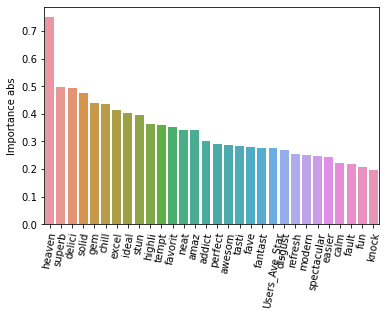

<Figure size 14400x21600 with 0 Axes>

In [95]:
sns.barplot(x = LS_importance[0:30].index ,y=LS_importance[0:30]['Importance abs'])
plt.xticks(rotation = 80)
plt.figure(figsize = (200,300))

In [100]:
X_train_LSimportant = X_train_clean[X_train_clean.columns[abs(ave_estimators) >= 0.001]]

In [101]:
X_train_LSimportant.columns

Index(['Useful', 'Cool', 'Funny', 'Bus_Ave_Star', 'Users_Ave_Star', 'open',
       'sinc', 'bore', 'safe', 'egg',
       ...
       'seat', 'regret', 'nice', 'great', 'must', 'definit', 'mexican', 'stop',
       'drag', 'appeal'],
      dtype='object', length=457)

The thredshold set for Lasso is 1e-3

### RF - feature_importance

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [107]:
rf = RandomForestRegressor(n_estimators=100)

In [108]:
rf.fit(X_train_clean, Y_train)

RandomForestRegressor()

In [109]:
rf.feature_importances_

array([1.11258368e-02, 9.90792676e-03, 7.97938005e-03, 1.28016949e-01,
       2.20556762e-02, 1.44563180e-02, 1.43661337e-02, 1.44415170e-02,
       1.44229301e-02, 1.06447926e-01, 1.37981321e-03, 1.41945553e-03,
       6.31346343e-04, 2.13993943e-04, 8.73274735e-04, 1.05691428e-03,
       3.04383025e-04, 1.63306341e-04, 2.82013957e-03, 1.22725410e-03,
       3.65841444e-04, 9.59042286e-04, 8.34547899e-03, 3.47695852e-03,
       2.84061116e-03, 8.66855798e-04, 1.65050060e-03, 9.86330324e-04,
       7.93320458e-04, 1.25232486e-04, 1.46414547e-04, 9.80431141e-04,
       1.10473132e-03, 2.08660035e-03, 1.88600919e-04, 1.01808178e-04,
       8.23295590e-04, 3.39077377e-03, 7.37478370e-04, 1.22581770e-03,
       9.99310847e-03, 5.99765259e-04, 2.02645787e-03, 7.78166008e-04,
       1.65298481e-03, 6.81618879e-04, 3.43485021e-03, 2.59925450e-04,
       6.01086680e-04, 9.26665632e-05, 1.58109334e-03, 1.86815732e-03,
       1.25953108e-03, 1.16592186e-03, 6.91469836e-03, 1.19322092e-03,
      

In [110]:
RF_importance = pd.DataFrame(rf.feature_importances_)
RF_importance.index = X_train_clean.columns
RF_importance.columns =  ["Importance"]
RF_importance = RF_importance.sort_values(by=['Importance'],ascending = False)

In [111]:
RF_importance

,Importance
Bus_Ave_Star,0.128017
Users_Ave_Star,0.106448
not,0.040095
User_Review_count,0.022056
great,0.017122
...,...
squash,0.000050
nicest,0.000050
winner,0.000049
peach,0.000046


<Figure size 28800x43200 with 0 Axes>

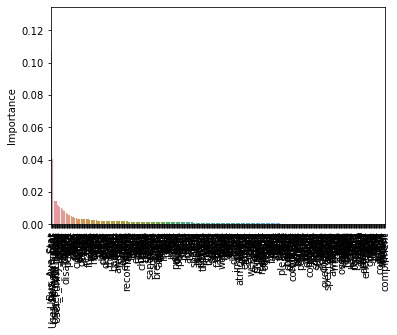

<Figure size 28800x43200 with 0 Axes>

In [117]:
sns.barplot(x = RF_importance.index ,y=RF_importance.Importance)
plt.xticks(rotation = 90)
plt.figure(figsize = (400,600))

### The most important features

<Figure size 14400x21600 with 0 Axes>

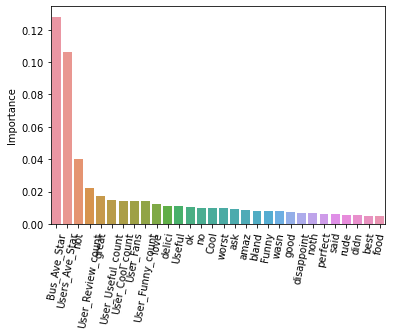

<Figure size 14400x21600 with 0 Axes>

In [116]:
sns.barplot(x = RF_importance[0:30].index ,y=RF_importance[0:30].Importance)
plt.xticks(rotation = 80)
plt.figure(figsize = (200,300))

### EDA for certain variables
+

For feature selection, we got different results for LASSO and random forest. The way they select the importance is different. 
1. The most important features should be rated high in both method, thus we set a thredshold for both.
2. hyperparameter的值可能会对feature importance有点影响，但是我觉得影响应该不大。因为RF是随机挑选的feature去构造树。只要树够多，基本上都会考虑到所有的feature


所以我们准备重新run一下random forest feature selection using more trees, 并且用另外一种方式 - average mean decrease 比较结果

step:  
   1. rerun the above code with more estimators
   2. rerun the random forest feature selection with more estimators and average mean decrease
   3. set up a thredshold for both LASSO and random forest selection results and selected fewer features
       - can also use LASSO first then random forest because RF is not able to differentiate correlated features
   4. briefly estimated the range of the best parameters and use random grid
   5. estimate the best parameter using gram grid
   6. ROC curve
   


**有一个争议比较大的variable: User review count. It ranked really low in LASSO but relative high in RF**

### RF importance using permutation

In [118]:
perm_importance = permutation_importance(rf, X_train_clean, Y_train)

In [119]:
perm_importance.importances_mean

array([1.98463590e-02, 3.35514248e-02, 1.68071310e-02, 5.06354103e-01,
       3.73072803e-02, 2.06052093e-02, 2.11916073e-02, 2.13836278e-02,
       2.09057843e-02, 4.23084179e-01, 1.09723614e-03, 1.26512688e-03,
       5.37012787e-04, 1.06173082e-04, 6.13583638e-04, 8.48475837e-04,
       1.93615993e-04, 8.14302830e-05, 2.70483796e-03, 1.36155503e-03,
       3.22935991e-04, 8.82630330e-04, 3.51974854e-02, 3.79565570e-03,
       6.01273499e-03, 6.52104359e-04, 1.42858267e-03, 7.64383081e-04,
       7.24675997e-04, 5.82797180e-05, 8.83511718e-05, 6.93249109e-04,
       9.14137764e-04, 1.90958673e-03, 9.91567442e-05, 4.79325423e-05,
       6.03908308e-04, 6.85626362e-03, 5.35652817e-04, 9.77679195e-04,
       2.27102437e-02, 3.91690200e-04, 2.05085553e-03, 7.11682034e-04,
       1.38717646e-03, 5.07862660e-04, 3.60987802e-03, 1.68769359e-04,
       4.22354913e-04, 4.61731421e-05, 2.17970615e-03, 1.83558341e-03,
       1.12262582e-03, 8.69203311e-04, 1.81343555e-02, 8.95215101e-04,
      

In [120]:
perm_importance = pd.DataFrame(perm_importance.importances_mean)
perm_importance.index = X_train_clean.columns
perm_importance.columns =  ["Importance"]
perm_importance = perm_importance.sort_values(by=['Importance'],ascending = False)

In [121]:
perm_importance

,Importance
Bus_Ave_Star,0.506354
Users_Ave_Star,0.423084
not,0.226219
great,0.110210
love,0.072812
...,...
peach,0.000024
nicest,0.000023
boil,0.000023
compliment,0.000020


<Figure size 14400x21600 with 0 Axes>

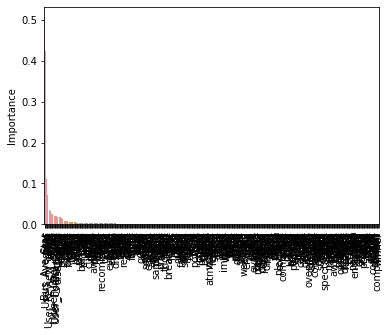

<Figure size 14400x21600 with 0 Axes>

In [122]:
sns.barplot(x = perm_importance.index ,y=perm_importance.Importance)
plt.xticks(rotation = 90)
plt.figure(figsize = (200,300))

<Figure size 14400x21600 with 0 Axes>

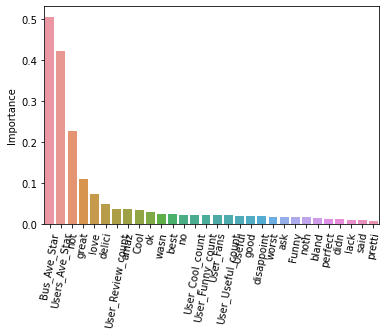

<Figure size 14400x21600 with 0 Axes>

In [123]:
sns.barplot(x = perm_importance[0:30].index ,y=perm_importance[0:30].Importance)
plt.xticks(rotation = 80)
plt.figure(figsize = (200,300))

In [135]:
rf.score(X_train_clean,Y_train)

0.9196788133918838

In [136]:
#救命....
#速速tune一些parameter...
rf.score(X_test_clean,Y_test)

0.3916947636887911

In [137]:
#LASSO selected features
X_train_LSimportant.columns

Index(['Useful', 'Cool', 'Funny', 'Bus_Ave_Star', 'Users_Ave_Star', 'open',
       'sinc', 'bore', 'safe', 'egg',
       ...
       'seat', 'regret', 'nice', 'great', 'must', 'definit', 'mexican', 'stop',
       'drag', 'appeal'],
      dtype='object', length=457)

In [141]:
# RF_Gini_importance features
RF_gini_selected = RF_importance[RF_importance['Importance'] >= 0.005].index
RF_gini_selected

Index(['Bus_Ave_Star', 'Users_Ave_Star', 'not', 'User_Review_count', 'great',
       'User_Useful_count', 'User_Cool_count', 'User_Fans', 'User_Funny_count',
       'love', 'delici', 'Useful', 'ok', 'no', 'Cool', 'worst', 'ask', 'amaz',
       'bland', 'Funny', 'wasn', 'good', 'disappoint', 'noth', 'perfect',
       'said', 'rude', 'didn', 'best'],
      dtype='object')

In [146]:
# RF_permutation_importance features
RF_per_selected = perm_importance[perm_importance['Importance'] >= 0.005].index
RF_per_selected

Index(['Bus_Ave_Star', 'Users_Ave_Star', 'not', 'great', 'love', 'delici',
       'User_Review_count', 'amaz', 'Cool', 'ok', 'wasn', 'best', 'no',
       'User_Cool_count', 'User_Funny_count', 'User_Fans', 'User_Useful_count',
       'Useful', 'good', 'disappoint', 'worst', 'ask', 'Funny', 'noth',
       'bland', 'perfect', 'didn', 'lack', 'said', 'pretti', 'mayb', 'rude',
       'food', 'decent', 'veri', 'friendli', 'santa', 'order', 'like',
       'better'],
      dtype='object')

In [157]:
## 3个intersection
three_selected = list(set(RF_gini_selected).intersection(set(RF_per_selected)).intersection(set(X_train_LSimportant.columns[:100])))

In [167]:
## tree structure model selections
tree_selected = list(set(RF_gini_selected).intersection(set(RF_per_selected)))

## linear selection
lasso_selected = list(X_train_LSimportant.columns)

# Classification

In [126]:
# Transform the Testing sets - X_test
X_test['Review']

21470    First off to the other reviewer: O'Douls? \n\n...
34181    Great experience!! $5 for 6 tastings. The Pino...
37368    I give this hotel 4 stars because I loved my r...
40228    Really great treat and a relaxing break downto...
50044    I stopped in on a football Sunday. My party of...
                               ...                        
43292    Great portions of food at a great price! I lov...
53587    Okay 2nd time here and the same bartender as l...
1460     My third Thai meal in CA and I have been consi...
51256    If you find yourself looking for a comfortable...
2788     Thank you for the warm hospitality and graciou...
Name: Review, Length: 10769, dtype: object

In [127]:
X_test_vec = CountVec.transform(X_test['Review'])

In [128]:
X_test_vec

<10769x8511 sparse matrix of type '<class 'numpy.int64'>'
	with 404213 stored elements in Compressed Sparse Row format>

In [129]:
BOW_df_test = pd.DataFrame(data=X_test_vec.toarray(),columns = CountVec.get_feature_names())

In [130]:
BOW_df_test = BOW_df_test[bow_dic]
BOW_df_test.head()

,open,sinc,bore,safe,egg,portion,burn,crack,realli,overal,...,seat,regret,nice,great,must,definit,mexican,stop,drag,appeal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
BOW_df_test.index = X_test.index

In [132]:
X_test_clean = pd.concat([X_test, BOW_df_test], axis=1)
X_test_clean = X_test_clean.drop('Review',axis = 1)

In [133]:
X_test_clean.head()

,Useful,Cool,Funny,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,User_Fans,Users_Ave_Star,...,seat,regret,nice,great,must,definit,mexican,stop,drag,appeal
21470,0,1,1,4.0,440,1109,885,1030,41,3.99,...,0,0,0,0,0,0,0,0,0,0
34181,1,0,0,4.0,377,521,219,272,16,4.22,...,0,0,1,1,0,0,0,0,0,0
37368,0,0,0,2.5,326,374,116,165,19,4.08,...,0,0,0,3,0,0,0,0,0,0
40228,2,1,1,4.0,325,725,87,145,12,4.46,...,0,0,0,1,0,0,0,0,0,0
50044,0,0,0,4.0,309,551,238,262,24,3.69,...,0,0,0,0,0,0,0,0,0,0


In [134]:
Y_test

21470    4.0
34181    5.0
37368    4.0
40228    5.0
50044    4.0
        ... 
43292    5.0
53587    3.0
1460     5.0
51256    1.0
2788     5.0
Name: Star, Length: 10769, dtype: float64

### Train Logistice Regression

hyperparameters that we want to tune for LG:
    - 

In [170]:
X_train_LG = X_train_clean[lasso_selected]
X_test_LG = X_test_clean[lasso_selected]

In [171]:
LG = LogisticRegression(solver='liblinear',C=1.0, random_state=0).fit(X_train_LG,Y_train)
LG.score(X_test_LG,Y_test), LG.score(X_train_LG,Y_train)

(0.5474045872411551, 0.5965270684371808)

In [172]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, LG.predict(X_test_LG))

array([[ 134,   51,   62,   88,   44],
       [  60,   82,  185,  278,   87],
       [  38,   63,  398,  903,  287],
       [  13,   17,  176, 2023, 1502],
       [  18,    9,   33,  960, 3258]])

### Train RF
hyperparameters that we want to tune for RF: 
   - n_estimators
   - max_features
   - max_depth
   - min_samples_split
   - min_samples_leaf

Thus, we **first use random search cross validation** to to narrow our search is to evaluate a wide range of values for each hyperparameter. Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

Then, we use **Grid search cross validation**

#### Train RF with all features

In [467]:
[int(x) for x in np.linspace(10, 330, num = 11)]

[10, 42, 74, 106, 138, 170, 202, 234, 266, 298, 330]

In [173]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 150, num = 3)]
# Number of features to consider at every split
max_features = ['sqrt','log2']
# Maximum number of levels in tree
max_depth = [5,15]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [4,6]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}
print(random_grid)

{'n_estimators': [50, 100, 150], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 15, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [4, 6]}


We try to run the whole dataset and features in in the matric but it is too slow so we think it would be a better idea to do select the features and estimate the parameters first 

In [174]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_clean[tree_selected], Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 15, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [4, 6],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, verbose=2)

In [175]:
rf_random.best_params_

{'n_estimators': 150,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': None}

[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=  13.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   7.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=  14.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   7.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   3.3s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=50; total time=   1.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=50; total time=   1.7s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=50; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, mi

In [176]:
rf_optimal = RandomForestClassifier(n_estimators= 150, min_samples_split =  2, 
                                    min_samples_leaf= 4,max_features= 'log2',max_depth= None)
rf_optimal.fit(X_train_clean[tree_selected],Y_train)

RandomForestClassifier(max_features='log2', min_samples_leaf=4,
                       n_estimators=150)

In [177]:
rf_optimal.score(X_train_clean[three_selected],Y_train)

0.8104977249512489

In [178]:
rf_optimal.score(X_test_clean[tree_selected],Y_test)

0.5249326771287957

### RF pick thredshold (ROC curve)

In [179]:
X_train

,Useful,Cool,Funny,Review,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,User_Fans,Users_Ave_Star
8508,5,2,1,real reason give place star passion fruit cock...,4.0,2100,5196,1852,3079,200,4.08
21610,0,0,0,glad place goleta grab quick good seafood favo...,4.0,195,208,50,70,7,4.05
9895,2,0,0,think come back no neck tattoo polici bf clean...,3.5,293,556,134,277,29,4.32
20283,0,1,0,friend india still love place take good sign o...,4.5,1036,2667,1609,2075,105,4.01
936,1,1,2,love sun tue amaz cheap burger special take ad...,4.0,217,665,353,352,56,3.71
...,...,...,...,...,...,...,...,...,...,...,...
8887,0,0,0,perfectli adequ nail salon not mani thrill wou...,3.5,231,169,34,22,1,3.47
18716,0,0,0,group us came sundai brunch surprisingli seat ...,4.0,443,492,281,225,27,3.81
28554,0,0,0,food pretti tasti past morn order scrambl egg ...,4.0,1535,1889,824,1912,23,3.85
18007,0,0,0,give place cute littl place opt go beat crowde...,4.0,404,430,99,193,23,3.80
